# Plot age vs action

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from rotation import search_tables, teff2bv, age_model_b
import os
from actions import calc_actions
from rotation import age_model_mh, age_model_b

DATA_DIR = "data"
RESULTS_DIR = "results"

/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# load kepler-tgas
kplr_tgas = pd.read_csv("kplr_tgas_periods.csv")

gyro_ages = np.zeros(len(kplr_tgas.kepid.values))
m = (kplr_tgas.B_V.values > .495) * (kplr_tgas.prot.values > 0) * (kplr_tgas.logg.values > 4) \
    * (kplr_tgas.teff.values < 6500)
gyro_ages[m] = age_model_mh(kplr_tgas.prot.values[m], kplr_tgas.B_V.values[m])

/Users/ruthangus/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



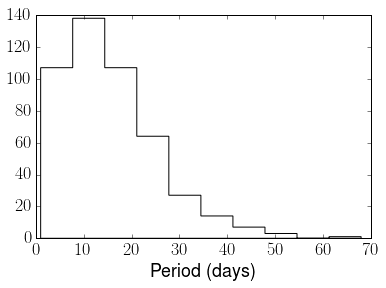

In [3]:
plt.hist(kplr_tgas.prot.values[m], histtype="stepfilled", color="w")
plt.xlabel("Period (days)")

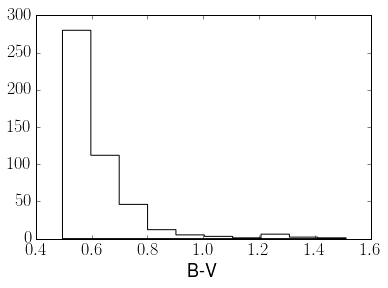

In [4]:
plt.hist(kplr_tgas.B_V.values[m], histtype="stepfilled", color="w")
plt.xlabel("B-V")

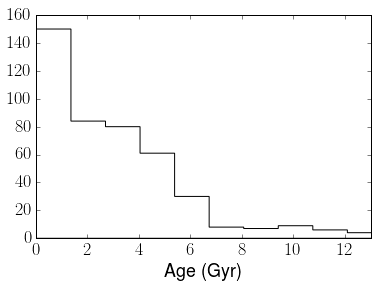

In [5]:
plt.hist(gyro_ages[m], 50, histtype="stepfilled", color="w")
plt.xlim(0, 13)
plt.xlabel("Age (Gyr)")

In [6]:
print(age_model_b(26, .65))

4.367423559459392


In [7]:
ra_deg = kplr_tgas.ra
dec_deg = kplr_tgas.dec
d_kpc = 1./kplr_tgas.tgas_parallax

# Velocity of stars:
pm_ra_masyr = kplr_tgas.tgas_pmra # pm in direction of RA [mas/yr]
pm_dec_masyr = kplr_tgas.tgas_pmdec  # pm in direction of dec [mas/yr]
v_los_kms = np.zeros_like(kplr_tgas.tgas_pmra)  # line-of-sight velocity [km/s]
calc_actions(ra_deg, dec_deg, d_kpc, pm_ra_masyr, pm_dec_masyr, v_los_kms)

v_z = calc_actions(ra_deg, dec_deg, d_kpc, pm_ra_masyr, pm_dec_masyr, v_los_kms)

R =  [ 7.9487769   7.90423991  7.93910055 ...,  7.97888014  7.91646193
  7.87357425] 	 kpc
phi =  [ 0.04324268  0.11247741  0.06142015 ...,  0.01749517  0.0582035
  0.10008277] 	 rad
z =  [ 0.0933189   0.1889619   0.10788815 ...,  0.04828841  0.1471929
  0.23343053] 	 kpc
v_R =  [  6.4828996   13.15260583  14.80004311 ...,  -8.9401243  -34.04366252
  36.55146538] 	 km/s
v_T =  [ 232.13347217  227.11627733  231.97750881 ...,  235.43470653  222.77673962
  230.44126229] 	 km/s
v_z =  [  3.73660008  22.64442054   4.9028466  ..., -24.5248616   15.52855418
  16.01931776] 	 km/s
R =  [ 7.9487769   7.90423991  7.93910055 ...,  7.97888014  7.91646193
  7.87357425] 	 kpc
phi =  [ 0.04324268  0.11247741  0.06142015 ...,  0.01749517  0.0582035
  0.10008277] 	 rad
z =  [ 0.0933189   0.1889619   0.10788815 ...,  0.04828841  0.1471929
  0.23343053] 	 kpc
v_R =  [  6.4828996   13.15260583  14.80004311 ...,  -8.9401243  -34.04366252
  36.55146538] 	 km/s
v_T =  [ 232.13347217  227.11627733  231.9775088

In [8]:
#plt.hist(v_z, 1000, histtype="stepfilled", color="w")
#plt.xlim(-500, 500)
#plt.xlabel("v_z")

NameError: name 'bins' is not defined

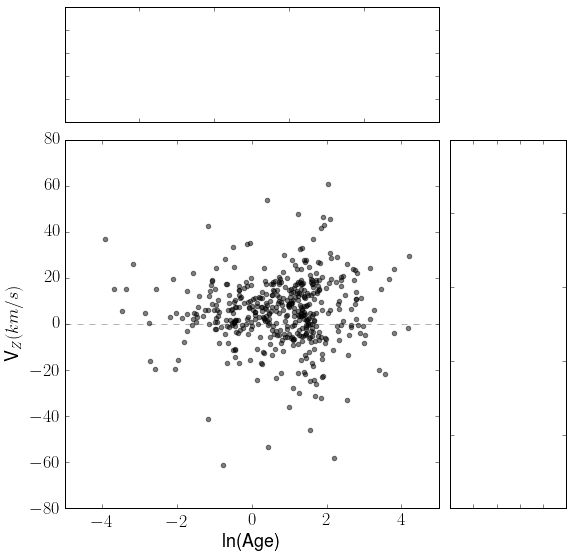

In [9]:
age = np.log(gyro_ages[m])

# scatter plot variables and settings
from matplotlib.ticker import NullFormatter
left, width = .1, .65
bottom, height = .1, .64
bottom_h = left_h = left + width + .02
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, .2]
rect_histy = [left_h, bottom, .2, height]
plt.figure(1, figsize=(8, 8))
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
nullfmt = NullFormatter()
axHistx.xaxis.set_major_formatter(nullfmt)
axHistx.yaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)
axHisty.xaxis.set_major_formatter(nullfmt)

# plot scatter plot
axScatter.axhline(0, color=".7", zorder=0, linestyle="--")
axScatter.scatter(age, v_z[m], marker="o", color="k", alpha=.5)

axScatter.set_ylabel("V_Z (km/s)")
axScatter.set_xlabel("ln(Age)")
axScatter.set_xlim(bins[0], bins[-1])

# plot histograms
axHistx.hist(age, 30, histtype="stepfilled", color="w")
axScatter.set_xlim(bins[0], bins[-1])
axHisty.hist(v_z[m], 30, histtype="stepfilled", color="w", orientation="horizontal")
axHisty.axhline(0, color=".8", linestyle="--")

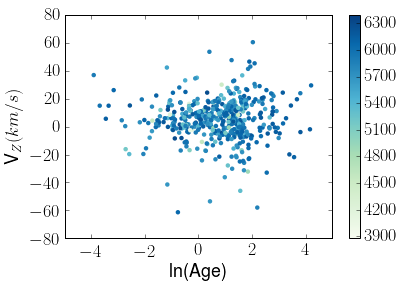

In [10]:
plt.scatter(age, v_z[m], marker="o", c=kplr_tgas.teff.values[m], edgecolor="None",
           cmap="GnBu")
plt.colorbar()
plt.xlabel("ln(Age)")
plt.ylabel("V_Z (km/s)")

In [11]:
def calc_dispersion(age, vz, nbins):
    RMS = lambda x: (np.median(x**2))**.5
    hist_age, bins = np.histogram(age, nbins)  # make histogram
    dispersions, Ns = [], []
    m = age < bins[0]
    dispersions.append(RMS(vz[m]))
    Ns.append(len(age[m]))
    for i in range(len(bins)-1):
        m = (bins[0] < age) * (age < bins[i+1])
        if len(age[m]):
            dispersions.append(RMS(vz[m]))
            Ns.append(len(age[m]))
    return np.array(dispersions), bins, np.array(Ns)

/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))

/Users/ruthangus/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)

/Users/ruthangus/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in power



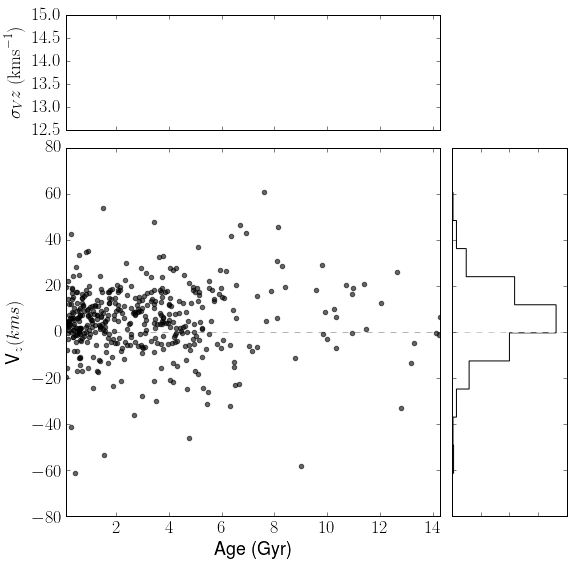

In [12]:
plotpar = {'axes.labelsize': 18,
           'text.fontsize': 10,
           'legend.fontsize': 18,
           'xtick.labelsize': 18,
           'ytick.labelsize': 18,
           'text.usetex': True}
plt.rcParams.update(plotpar)

m2 = (gyro_ages[m] > 0.1) * (gyro_ages[m] < 15)
age2, vz2 = gyro_ages[m][m2], v_z[m][m2]

dispersions, bins, Ns = calc_dispersion(age2, vz2, 5)

# scatter plot variables and settings
left, width = .1, .65
bottom, height = .1, .64
bottom_h = left_h = left + width + .02
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, .2]
rect_histy = [left_h, bottom, .2, height]
plt.figure(1, figsize=(8, 8))
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
nullfmt = NullFormatter()
axHistx.xaxis.set_major_formatter(nullfmt)
#axHistx.yaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)
axHisty.xaxis.set_major_formatter(nullfmt)

# plot scatter plot
axScatter.axhline(0, color=".7", zorder=0, linestyle="--")
axScatter.scatter(age2, vz2, marker="o", color="k", alpha=".6", zorder=1)

axScatter.set_ylabel("V_z (kms)")
axScatter.set_xlabel("Age (Gyr)")
axScatter.set_xlim(bins[0], bins[-1])

# plot histograms
axHistx.step(bins, np.array(dispersions), color="k")
d_err = dispersions / (2 * Ns - 2)**.5
axHistx.errorbar(bins-.5*(bins[1]-bins[0]), np.array(dispersions), yerr=d_err, fmt="k.", capsize=0, ms=.1)
axHisty.hist(v_z[m], 10, histtype="stepfilled", color="w", orientation="horizontal")
axHisty.axhline(0, color=".8", linestyle="--")
axHistx.set_xlim(bins[0], bins[-1])
axHistx.set_ylim(12.5, 15)
axHistx.set_ylabel("$\sigma_Vz~(\mathrm{kms}^{-1})$")

/Users/ruthangus/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)

/Users/ruthangus/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:35: RuntimeWarning: invalid value encountered in power



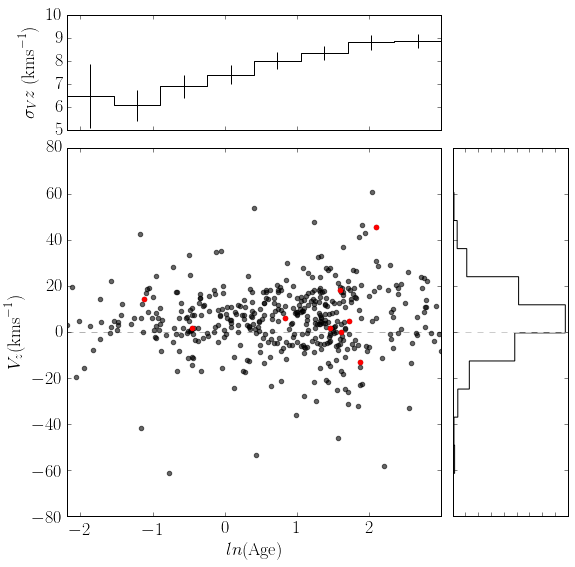

In [13]:
m2 = (gyro_ages[m] > 0.1) * (gyro_ages[m] < 20)
age2, vz2 = np.log(gyro_ages[m][m2]), v_z[m][m2]

#vz2 = np.random.randn(10000) * 5
#age2 = np.random.uniform(-2, 2, 10000)
dispersions, bins, Ns = calc_dispersion(age2, vz2, 8)

# scatter plot variables and settings
left, width = .1, .65
bottom, height = .1, .64
bottom_h = left_h = left + width + .02
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, .2]
rect_histy = [left_h, bottom, .2, height]
plt.figure(1, figsize=(8, 8))
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
nullfmt = NullFormatter()
axHistx.xaxis.set_major_formatter(nullfmt)
#axHistx.yaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)
axHisty.xaxis.set_major_formatter(nullfmt)

# plot scatter plot
axScatter.axhline(0, color=".7", zorder=0, linestyle="--")
axScatter.scatter(age2, vz2, marker="o", color="k", alpha=".6", zorder=1)

axScatter.set_ylabel("$V_z (\mathrm{kms}^{-1})$")
axScatter.set_xlabel("$ln(\mathrm{Age})$")
axScatter.set_xlim(bins[0], bins[-1])

# plot histograms
axHistx.step(bins, np.array(dispersions), color="k")
d_err = dispersions / (2 * Ns - 2)**.5
axHistx.errorbar(bins-.5*(bins[1]-bins[0]), np.array(dispersions), yerr=d_err, fmt="k.", capsize=0, ms=.1)
axHisty.hist(vz2, 10, histtype="stepfilled", color="w", orientation="horizontal")
axHisty.axhline(0, color=".8", linestyle="--")
axHistx.set_xlim(bins[0], bins[-1])
axHistx.set_ylim(5, 10)
axHistx.set_ylabel("$\sigma_Vz~(\mathrm{kms}^{-1})$")
plt.subplots_adjust(left=.8)

# add planets
planets = pd.read_csv("cumulative.csv", comment="#")
planets = planets[planets.koi_pdisposition=="CANDIDATE"]
kplr_tgas["gyro_age"] = gyro_ages
kplr_tgas["v_z"] = v_z
tgas_planets = pd.merge(planets, kplr_tgas, on="kepid")
m = (kplr_tgas.B_V.values > .495) * (kplr_tgas.prot.values > 0) * (kplr_tgas.logg.values > 4) \
    * (kplr_tgas.teff.values < 6500)
age2, vz2 = np.log(kplr_tgas.gyro_age.values[m]), kplr_tgas.v_z[m]
m2 = tgas_planets.gyro_age > 0
axScatter.scatter(np.log(tgas_planets.gyro_age[m2]), tgas_planets.v_z[m2], marker="o", color="r", zorder=1)

plt.savefig("age_action")

Add planets

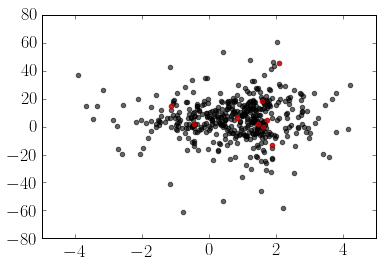

In [14]:
planets = pd.read_csv("cumulative.csv", comment="#")
planets = planets[planets.koi_pdisposition=="CANDIDATE"]
kplr_tgas["gyro_age"] = gyro_ages
kplr_tgas["v_z"] = v_z
tgas_planets = pd.merge(planets, kplr_tgas, on="kepid")
#nplanets = tgas_planets.groupby("kepid").count()[["koi_period"]]
#print(nplanets.keys())
#print(nplanets.index)
#nplanets["kepid"] = nplanets.index
#pl = pd.merge(nplanets, tgas_planets, on="kepid")
#print(pl)

m = (kplr_tgas.B_V.values > .495) * (kplr_tgas.prot.values > 0) * (kplr_tgas.logg.values > 4) \
    * (kplr_tgas.teff.values < 6500)
age2, vz2 = np.log(kplr_tgas.gyro_age.values[m]), kplr_tgas.v_z[m]
plt.scatter(age2, vz2, marker="o", color="k", alpha=".6", zorder=1)
m2 = tgas_planets.gyro_age > 0
plt.scatter(np.log(tgas_planets.gyro_age[m2]), tgas_planets.v_z[m2], marker="o", color="r", alpha=".6", zorder=1)

In [15]:
Now with dummy data

SyntaxError: invalid syntax (<ipython-input-15-1f03a46f8c6a>, line 1)

In [16]:
# load kepler-tgas
kplr_tgas = pd.read_csv("kplr_tgas_periods.csv")

gyro_ages2 = np.zeros(len(kplr_tgas.kepid.values))
m = (kplr_tgas.B_V.values > .4) * (kplr_tgas.prot.values > 0) * (kplr_tgas.logg.values > 4) \
    * (kplr_tgas.teff.values < 6500)
gyro_ages2[m] = age_model_mh(kplr_tgas.prot.values[m], kplr_tgas.B_V.values[m])
mold = kplr_tgas.prot.values > 15
gyro_ages2[mold] = 2 * np.random.randn(len(gyro_ages2[mold])) + 6 

m = (kplr_tgas.B_V.values > .495) * (kplr_tgas.prot.values > 0) * (kplr_tgas.logg.values > 4) \
    * (kplr_tgas.teff.values < 6500)

/Users/ruthangus/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)

/Users/ruthangus/projects/gaia-wide-binaries/rotation.py:36: RuntimeWarning: invalid value encountered in power
  return (p / (a * (bv - c)**b))**(1./n) / 1000



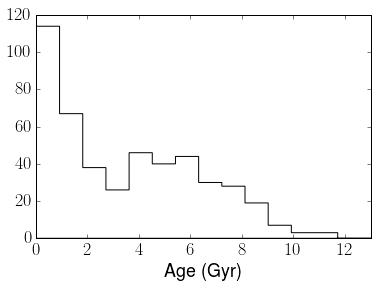

In [17]:
plt.hist(gyro_ages2[m], 50, histtype="stepfilled", color="w")
plt.xlim(0, 13)
plt.xlabel("Age (Gyr)")

In [18]:
ra_deg = kplr_tgas.ra
dec_deg = kplr_tgas.dec
d_kpc = 1./kplr_tgas.tgas_parallax

# Velocity of stars:
pm_ra_masyr = kplr_tgas.tgas_pmra # pm in direction of RA [mas/yr]
pm_dec_masyr = kplr_tgas.tgas_pmdec  # pm in direction of dec [mas/yr]
v_los_kms = np.zeros_like(kplr_tgas.tgas_pmra)  # line-of-sight velocity [km/s]
calc_actions(ra_deg, dec_deg, d_kpc, pm_ra_masyr, pm_dec_masyr, v_los_kms)

v_z = calc_actions(ra_deg, dec_deg, d_kpc, pm_ra_masyr, pm_dec_masyr, v_los_kms)

R =  [ 7.9487769   7.90423991  7.93910055 ...,  7.97888014  7.91646193
  7.87357425] 	 kpc
phi =  [ 0.04324268  0.11247741  0.06142015 ...,  0.01749517  0.0582035
  0.10008277] 	 rad
z =  [ 0.0933189   0.1889619   0.10788815 ...,  0.04828841  0.1471929
  0.23343053] 	 kpc
v_R =  [  6.4828996   13.15260583  14.80004311 ...,  -8.9401243  -34.04366252
  36.55146538] 	 km/s
v_T =  [ 232.13347217  227.11627733  231.97750881 ...,  235.43470653  222.77673962
  230.44126229] 	 km/s
v_z =  [  3.73660008  22.64442054   4.9028466  ..., -24.5248616   15.52855418
  16.01931776] 	 km/s
R =  [ 7.9487769   7.90423991  7.93910055 ...,  7.97888014  7.91646193
  7.87357425] 	 kpc
phi =  [ 0.04324268  0.11247741  0.06142015 ...,  0.01749517  0.0582035
  0.10008277] 	 rad
z =  [ 0.0933189   0.1889619   0.10788815 ...,  0.04828841  0.1471929
  0.23343053] 	 kpc
v_R =  [  6.4828996   13.15260583  14.80004311 ...,  -8.9401243  -34.04366252
  36.55146538] 	 km/s
v_T =  [ 232.13347217  227.11627733  231.9775088

/Users/ruthangus/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)

/Users/ruthangus/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in power

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in power



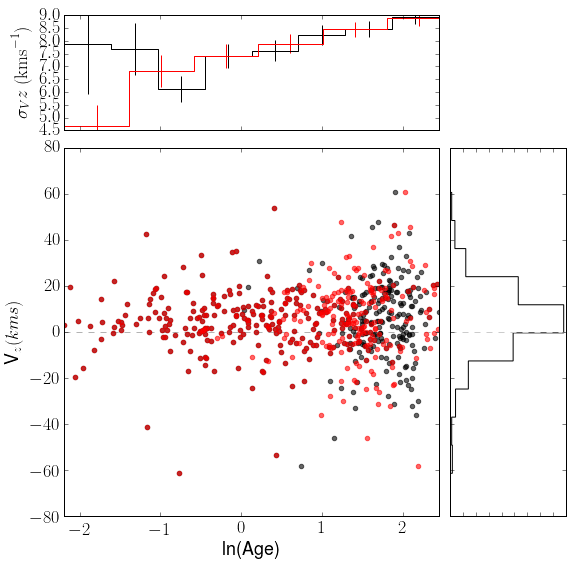

In [19]:
m2 = (gyro_ages2[m] > 0.1) * (gyro_ages2[m] < 20)
age2, vz2 = np.log(gyro_ages2[m][m2]), v_z[m][m2]
age1, vz1 = np.log(gyro_ages[m][m2]), v_z[m][m2]

#vz2 = np.random.randn(10000) * 5
#age2 = np.random.uniform(-2, 2, 10000)
dispersions, bins, Ns = calc_dispersion(age2, vz2, 8)
dispersions1, bins1, Ns1 = calc_dispersion(age1, vz2, 8)

# scatter plot variables and settings
left, width = .1, .65
bottom, height = .1, .64
bottom_h = left_h = left + width + .02
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, .2]
rect_histy = [left_h, bottom, .2, height]
plt.figure(1, figsize=(8, 8))
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
nullfmt = NullFormatter()
axHistx.xaxis.set_major_formatter(nullfmt)
#axHistx.yaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)
axHisty.xaxis.set_major_formatter(nullfmt)

# plot scatter plot
axScatter.axhline(0, color=".7", zorder=0, linestyle="--")
axScatter.scatter(age2, vz2, marker="o", color="k", alpha=".6", zorder=1)
axScatter.scatter(age1, vz1, marker="o", color="r", alpha=".6", zorder=1)

axScatter.set_ylabel("V_z (kms)")
axScatter.set_xlabel("ln(Age)")
axScatter.set_xlim(bins[0], bins[-1])

# plot histograms
axHistx.step(bins, np.array(dispersions), color="k")
axHistx.step(bins1, np.array(dispersions1), color="r")
d_err = dispersions / (2 * Ns - 2)**.5
d_err1 = dispersions1 / (2 * Ns1 - 2)**.5
axHistx.errorbar(bins-.5*(bins[1]-bins[0]), np.array(dispersions), yerr=d_err, fmt="k.", capsize=0, ms=.1)
axHistx.errorbar(bins1-.5*(bins1[1]-bins1[0]), np.array(dispersions1), yerr=d_err1, fmt="r.", capsize=0, ms=.1)
axHisty.hist(vz2, 10, histtype="stepfilled", color="w", orientation="horizontal")
axHisty.axhline(0, color=".8", linestyle="--")
axHistx.set_xlim(bins[0], bins[-1])
axHistx.set_ylabel("$\sigma_Vz~(\mathrm{kms}^{-1})$")